<a href="https://colab.research.google.com/github/Fahdlabba/Covid-19-Detection-/blob/main/Covid_19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

covid19-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
from zipfile import ZipFile
dataset="/content/covid19-image-dataset.zip"

with ZipFile(dataset,'r') as zip :
  zip.extractall()

In [10]:
import numpy as np
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [11]:
train_path="/content/Covid19-dataset/train"
test_path="/content/Covid19-dataset/test"

In [12]:
data=[]
labels=[]
folder=os.listdir(train_path)
paths =[train_path,test_path]
for path in paths :
  for sub_path in folder :
    for img in os.listdir(os.path.join("/content/Covid19-dataset",path,sub_path)):
      if sub_path=='Covid' :
        labels.append(1)
      elif sub_path=='Normal':
        labels.append(0)
      else :
        labels.append(2)
      image=Image.open(os.path.join("/content/Covid19-dataset",path,sub_path)+ '/'+img)
      image=image.resize((224,224))
      image=image.convert("RGB")
      image=np.array(image)
      data.append(image)

In [13]:
print(folder)

['Viral Pneumonia', 'Covid', 'Normal']


In [14]:
labels=np.array(labels)
labels[:5]
labels[300:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
data=np.array(data)

In [16]:
data.shape

(317, 224, 224, 3)

In [17]:
data[0]

array([[[24, 24, 24],
        [27, 27, 27],
        [28, 28, 28],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[24, 24, 24],
        [26, 26, 26],
        [28, 28, 28],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 1,  1,  1]],

       [[25, 25, 25],
        [28, 28, 28],
        [31, 31, 31],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)

In [18]:
import random

In [19]:
def display(data):
  random_list=[random.randint(0,317) for i in range (5)]

  for i in random_list :
    fig,ax=plt.subplots(figsize=(5,4))
    ax.imshow(data[i])
    plt.title(labels[i])

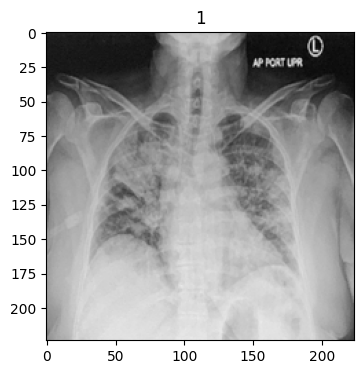

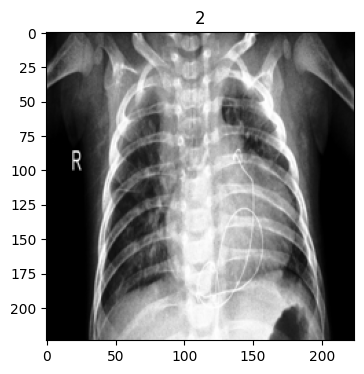

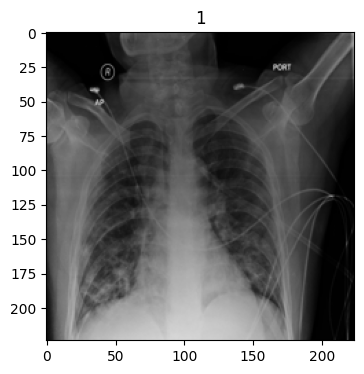

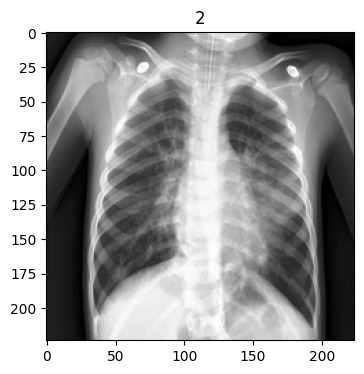

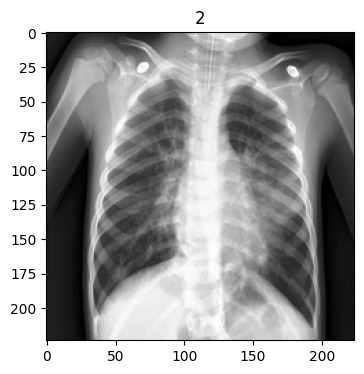

In [20]:
display(data)

In [21]:
import tensorflow as tf
from tensorflow import  keras
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,test_size=0.2)

In [23]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

#Let's Build Our CNN model  from scratch

In [24]:
model =keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3),
])

In [25]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True),
    metrics=["acc"]
)

In [26]:
history=model.fit(X_train_scaled,Y_train,epochs=5,batch_size=10)

Epoch 1/5
26/26 [==============================] - 6s 27ms/step - loss: 3.6618 - acc: 0.4822
Epoch 2/5
26/26 [==============================] - 0s 19ms/step - loss: 0.9717 - acc: 0.6798
Epoch 3/5
26/26 [==============================] - 0s 19ms/step - loss: 0.6682 - acc: 0.7194
Epoch 4/5
26/26 [==============================] - 1s 20ms/step - loss: 0.4080 - acc: 0.8538
Epoch 5/5
26/26 [==============================] - 0s 19ms/step - loss: 0.2600 - acc: 0.8893


In [28]:
loss,acc=model.evaluate(X_test_scaled,Y_test)

2/2 [==============================] - 1s 25ms/step - loss: 0.2016 - acc: 0.9375


In [80]:
def prepro_image(path):
  img=Image.open(path)
  img=img.resize((224,224))
  img=img.convert("RGB")
  img=np.array(img)
  img=img/255
  img_tensor = np.expand_dims(img, axis=0)
  return img_tensor

In [81]:
covid_lung=prepro_image("/content/lung-covid.x1be7823f.png")

In [89]:
predict=model.predict(covid_lung)

1/1 [==============================] - 0s 49ms/step


In [90]:
predict

array([[-4.27816  ,  2.0605614, -7.3066773]], dtype=float32)

In [91]:
predict_index =np.argmax(predict)

In [92]:
category=["Normal","Covid","Viral Pneumonia"]

In [93]:
print(category[predict_index])

Covid


Let's Fine Tunnig VGG16 model maybe we can do better

In [126]:
vgg = keras.applications.vgg16.VGG16()

In [127]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

1-> We need to freeze all the hidden layer
2-> pop the output layer and add our own layer(s)

In [128]:
vgg.layers

In [129]:
type(vgg)

keras.engine.functional.Functional

In [133]:
model=keras.Sequential()

for layer in vgg.layers[:-1] :
  model.add(layer)

In [136]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [137]:
for layer in model.layers :
  layer.trainable=False

In [138]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [140]:
model.add(keras.layers.Dense(3,activation =tf.keras.activations.softmax))

In [141]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [142]:
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=["acc"]
)

In [144]:
history=model.fit(X_train_scaled,Y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 127ms/step - loss: 0.6479 - acc: 0.7628
Epoch 2/10
8/8 [==============================] - 1s 124ms/step - loss: 0.5908 - acc: 0.7945
Epoch 3/10
8/8 [==============================] - 1s 122ms/step - loss: 0.5281 - acc: 0.8221
Epoch 4/10
8/8 [==============================] - 1s 122ms/step - loss: 0.5033 - acc: 0.8379
Epoch 5/10
8/8 [==============================] - 1s 121ms/step - loss: 0.4625 - acc: 0.8775
Epoch 6/10
8/8 [==============================] - 1s 122ms/step - loss: 0.4452 - acc: 0.8775
Epoch 7/10
8/8 [==============================] - 1s 124ms/step - loss: 0.4399 - acc: 0.8498
Epoch 8/10
8/8 [==============================] - 1s 123ms/step - loss: 0.4400 - acc: 0.8498
Epoch 9/10
8/8 [==============================] - 1s 126ms/step - loss: 0.4101 - acc: 0.8458
Epoch 10/10
8/8 [==============================] - 1s 125ms/step - loss: 0.3928 - acc: 0.9051


In [145]:
model.evaluate(X_test_scaled,Y_test)

2/2 [==============================] - 1s 149ms/step - loss: 0.4447 - acc: 0.8438


[0.44466447830200195, 0.84375]

Our CNN does better job xD ??
